# Final Project "Location Analytics "

### Find the  Pune District neighbourhood with similar population, Number of health cares and venues category

In [113]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 
import json
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
#conda install -c conda-forge folium=0.5.0 --yes 
import folium 
from pandas.io.json import json_normalize 
import matplotlib as plt    
from matplotlib import pyplot
from matplotlib import pyplot as pt

#### Get the picode of all places of Pune distict

#### Read the latitude and longitude of all places in India from csv file
#### Which is downloaded from http://download.geonames.org/export/zip/

In [2]:
lalg = pd.read_csv('latitude and longitude.csv')
lalg = lalg[['postal code','place name','District','District Subdivisions','latitude','longitude']]
lalg.shape

(155570, 6)

#### Extract latitude and longitude of all places of Pune distict

In [3]:
lalg=lalg.rename(columns = {'postal code':'PostalCode','place name':'Neighbourhood','Distric':'District','District Subdivisions':'Borough','latitude':'Latitude','longitude':'Longitude'})
lalg.drop_duplicates(subset=['PostalCode','Latitude','Longitude'],keep = 'first', inplace = True)

In [4]:
lalg.shape

(67325, 6)

In [5]:
lalg = lalg[lalg['District'] == 'Pune']
lalg.head()

,PostalCode,Neighbourhood,District,Borough,Latitude,Longitude
43089,410301,Khandala,Pune,Maval,18.7589,73.3694
43090,410302,R P T S Khandala,Pune,Maval,18.7589,73.3694
43091,410401,Ambavane,Pune,Maval,18.7528,73.4057
43095,410402,Ins Shivaji Lonavale,Pune,Mawal,19.4781,73.7845
43097,410403,Kaivalyadham,Pune,Maval,19.4781,73.7845


In [6]:
lalg.drop(['District'], axis = 1, inplace = True)
lalg.head()

,PostalCode,Neighbourhood,Borough,Latitude,Longitude
43089,410301,Khandala,Maval,18.7589,73.3694
43090,410302,R P T S Khandala,Maval,18.7589,73.3694
43091,410401,Ambavane,Maval,18.7528,73.4057
43095,410402,Ins Shivaji Lonavale,Mawal,19.4781,73.7845
43097,410403,Kaivalyadham,Maval,19.4781,73.7845


#### Now load the information of population and number of helth facilities are avelable of all places
#### It is very tedius job to clean this data of population. It comes from various sources, conflict in 
#### name, some figures in comma separeted, some are missing. I cealn this data and store in CSV file

In [7]:
ph = pd.read_csv("population.csv")
ph.head()

,Neighbourhood,Borough,Population,Hospital
0,Airport (Pune),Haveli,32857.0,23.0
1,Akurdi,Haveli,10000.0,7.0
2,Alandi Devachi,Khed,21387.0,15.0
3,Alegaon,Shirur,3183.0,2.0
4,Alegaon,Daund,548.0,1.0


#### combine two files

In [8]:
FinalData = lalg.merge(ph, on = ['Neighbourhood','Borough'], how = 'inner')
FinalData.head()

,PostalCode,Neighbourhood,Borough,Latitude,Longitude,Population,Hospital
0,410301,Khandala,Maval,18.7589,73.3694,6832.0,5.0
1,410302,R P T S Khandala,Maval,18.7589,73.3694,6832.0,5.0
2,410401,Ambavane,Maval,18.7528,73.4057,2000.0,1.0
3,410403,Kaivalyadham,Maval,19.4781,73.7845,800.0,1.0
4,410405,Karanjgaon,Maval,18.5709,74.0691,900.0,1.0


In [9]:
def getLatituteLongitude():
    geolocator = Nominatim()
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return location, latitude, longitude
def CreateMap(location, latitude, longitude):
    mapOfToronto = folium.Map(location=[latitude, longitude], zoom_start=11)
    # add markers to map
    for lat, lng, borough, Neighhbourhood in zip(FinalData['Latitude'], FinalData['Longitude'], FinalData['Borough'], FinalData['Neighbourhood']):
        label = '{}, {}'.format(Neighhbourhood, borough)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(mapOfToronto)
    return mapOfToronto

#### Show the all places on map

In [10]:
address = 'Pune'
location, longitude, latitude = getLatituteLongitude()
mapOfPune = CreateMap(location, latitude, longitude)
mapOfPune

C:\Users\Amresh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


![title](PuneNeighbourhood.jpg)

In [11]:
FinalData.tail()

,PostalCode,Neighbourhood,Borough,Latitude,Longitude,Population,Hospital
212,413801,Daund,Daund,18.4652,74.5838,6863.0,5.0
213,413801,Alegaon,Daund,18.6194,74.3342,548.0,1.0
214,413801,Malthan,Daund,18.3956,74.7271,4103.0,3.0
215,413801,Shirapur,Daund,18.4934,74.5484,2069.0,1.0
216,413802,MIDC Kurkumbh,Daund,18.4934,74.5484,3576.0,3.0


#### Now Population and Number of Helth Sevices are continuous values thransform them into categorical
#### See the histogram to decide binig value

Text(0.5, 1.0, 'Population bins')

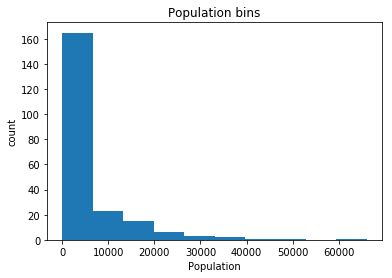

In [15]:
%matplotlib inline
plt.pyplot.hist(FinalData["Population"])
plt.pyplot.xlabel("Population")
plt.pyplot.ylabel("count")
plt.pyplot.title("Population bins")

![title](histPopulation.jpg)

Text(0.5, 1.0, 'Helth Service bins')

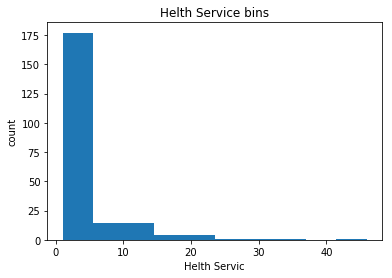

In [16]:
plt.pyplot.hist(FinalData["Hospital"])
plt.pyplot.xlabel("Helth Servic")
plt.pyplot.ylabel("count")
plt.pyplot.title("Helth Service bins")

![title](histHealtServices.jpg)

In [17]:
Pbins = np.linspace(min(FinalData["Population"]), max(FinalData["Population"]), 4)
Hbins = np.linspace(min(FinalData["Hospital"]), max(FinalData["Hospital"]), 4)

In [18]:
Pgroup_names = ['Low', 'Medium', 'High']
Hgroup_names = ['Less', 'Average', 'Good']
FinalData['Population-binned'] = pd.cut(FinalData['Population'], Pbins, labels=Pgroup_names, include_lowest=True )
FinalData[['Population','Population-binned']].head()

,Population,Population-binned
0,6832.0,Low
1,6832.0,Low
2,2000.0,Low
3,800.0,Low
4,900.0,Low


In [19]:
FinalData['Hospital-binned'] = pd.cut(FinalData['Hospital'], Hbins, labels=Hgroup_names, include_lowest=True )
FinalData[['Hospital','Hospital-binned']].head()

,Hospital,Hospital-binned
0,5.0,Less
1,5.0,Less
2,1.0,Less
3,1.0,Less
4,1.0,Less


#### Now convering Population and Hospital Categorical variable into dummy variable

In [20]:
Pdummy_variable = pd.get_dummies(FinalData["Hospital-binned"])
Pdummy_variable.head()

,Less,Average,Good
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [21]:
Hdummy_variable = pd.get_dummies(FinalData["Population-binned"])
Hdummy_variable.head()

,Low,Medium,High
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


#### Also convering Venue Category into dummy variable

In [37]:
def getNearbyVenues(names, latitudes, longitudes, Low,Medium,High,Less,Average,Good,radius=500):
    venues_list=[]
    for name, lat, lng,lo, me, hi, le, ag, gd in zip(names, latitudes, longitudes,Low,Medium,High,Less,Average,Good):
        print(name)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            lo,
            me,
            hi,
            le,
            ag,
            gd,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Low',
                  'Medium',
                  'High',
                  'Less',
                  'Average',
                  'Good',           
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

In [38]:
CLIENT_ID = 'A50URT31R1TO0YQUGV2DC11RZW0TNYG0LQIENFDEBNANGF1F'#'4AU333Y2SESNPOTJOHXO054UTUSCNFX0P1M3ZGT5B4UUJR5S' 
CLIENT_SECRET = 'QR0PYWFOYOXPILXKNKP3FEJVCIXQLP0MLABDQ5RZG0FGJH5U'#'DMYL5G1N0BAWC5B2E52MB3ZA5KUJTWUECC2BK4MG55ONDQH1'
VERSION = '20180604'
LIMIT = 30
radius = 500

In [ ]:
Venues = getNearbyVenues(names=FinalData['Neighbourhood'], latitudes=FinalData['Latitude'], longitudes=FinalData['Longitude'], 
                       Low = Hdummy_variable['Low'],Medium = Hdummy_variable['Medium'],High = Hdummy_variable['High'], 
                        Less = Pdummy_variable['Less'],Average = Pdummy_variable['Average'],Good = Pdummy_variable['Good'])

In [41]:
Venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Low,Medium,High,Less,Average,Good,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Khandala,18.7589,73.3694,1,0,0,1,0,0,Dukes Retreat Khandala,18.761514,73.370721,Hotel
1,Khandala,18.7589,73.3694,1,0,0,1,0,0,High Point @ Dukes Retreat,18.761639,73.370665,Hotel Bar
2,Khandala,18.7589,73.3694,1,0,0,1,0,0,Shooting point,18.758637,73.373100,Outdoors & Recreation
3,Khandala,18.7589,73.3694,1,0,0,1,0,0,Velvett Country,18.755733,73.367764,Resort
4,R P T S Khandala,18.7589,73.3694,1,0,0,1,0,0,Dukes Retreat Khandala,18.761514,73.370721,Hotel


In [42]:
Vdummy_variable = pd.get_dummies(Venues[['Venue Category']], prefix="", prefix_sep="")
Vdummy_variable.head()

,ATM,Antique Shop,Asian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bistro,Breakfast Spot,...,Seafood Restaurant,Shop & Service,Snack Place,Soccer Field,Stables,Tea Room,Tennis Court,Toll Plaza,Trail,Train Station
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Joining all features in a single table

In [129]:
Vdummy_variable = pd.get_dummies(Venues[['Venue Category']], prefix="", prefix_sep="")
Vdummy_variable[['Neighborhood','Low','Medium','High','Less','Average','Good']] = Venues[['Neighborhood','Low','Medium','High','Less','Average','Good']] 
fixed_columns = Vdummy_variable.columns.values[-7:-1].tolist() + list(Vdummy_variable.columns[:-7])
Vdummy_variable =Vdummy_variable[fixed_columns]
GroupedData = Vdummy_variable.groupby('Neighborhood').mean().reset_index()
GroupedData.head()

,Neighborhood,Low,Medium,High,Less,Average,ATM,Antique Shop,Asian Restaurant,BBQ Joint,...,Seafood Restaurant,Shop & Service,Snack Place,Soccer Field,Stables,Tea Room,Tennis Court,Toll Plaza,Trail,Train Station
0,Alephata,0,1,0,0,1,0.0,0.00,0.0,0.0,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00
1,Ambavane,1,0,0,1,0,0.0,0.04,0.0,0.0,...,0.0,0.0,0.04,0.0,0.00,0.0,0.0,0.0,0.04,0.04
2,Baner,1,0,0,1,0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00
3,Bhimashankar,1,0,0,1,0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00
4,Bhor,1,0,0,1,0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.00,0.0,0.25,0.0,0.0,0.0,0.00,0.00


#### Now ready to find out similar type places
#### Before clustering visualize our high dimentional data
#### To visualize high dimentional data we use T-SNE

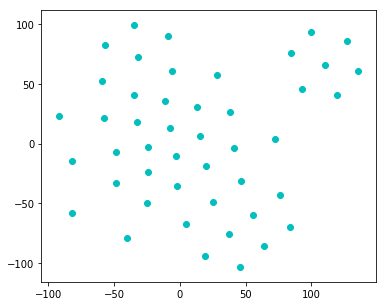

In [115]:
from sklearn.manifold import TSNE
%matplotlib inline
#GroupedData.drop('Neighborhood', 1,inplace = True)
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(GroupedData)
target_ids = range(GroupedData.shape[0])
pt.figure(figsize=(6, 5))
for i in target_ids:
    pt.scatter(X_2d[i, 0], X_2d[i, 1],c = 'c')
pt.show()

![title](ScaterPlot.jpg)

#### Looking the figure above we can say that there is group

#### Now we apply the k-means but befor we find the value of k

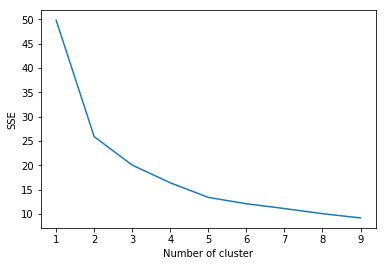

In [118]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(GroupedData)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
pt.figure()
pt.plot(list(sse.keys()), list(sse.values()))
pt.xlabel("Number of cluster")
pt.ylabel("SSE")
pt.show()

![title](LbeowCurve.jpg)

#### From the above figure K = 5 

In [119]:
k = 5
kmeans = KMeans(n_clusters=k, max_iter=1000).fit(GroupedData)

In [130]:
Venues = Venues.groupby('Neighborhood').mean().reset_index()

In [131]:
Venues.insert(0, 'Cluster Labels', kmeans.labels_)
Venues.head()

,Cluster Labels,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Low,Medium,High,Less,Average,Good,Venue Latitude,Venue Longitude
0,1,Alephata,18.6843,75.3725,0,1,0,0,1,0,18.684692,75.369821
1,0,Ambavane,18.7528,73.4057,1,0,0,1,0,0,18.752742,73.405481
2,0,Baner,18.5586,73.7794,1,0,0,1,0,0,18.559200,73.779779
3,0,Bhimashankar,19.0717,73.5359,1,0,0,1,0,0,19.073354,73.535496
4,0,Bhor,18.1486,73.8434,1,0,0,1,0,0,18.149654,73.843329


In [132]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=5)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Venues['Neighborhood Latitude'], Venues['Neighborhood Longitude'], Venues['Neighborhood'], Venues['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

![title](PuneClusterNeighbourhood.jpg)

## Cluster Analysis
#### Boostrap Evaluation is used for evaulating the stability of the clustering result 
#### Using the R language for this purpose

**The following code is in R Language that run on R-Studio and result are pated here**

In [ ]:
#library(fpc)
#df = read.csv("c:/users/amresh/test.csv",header = TRUE)
#cboot.Kclust <- clusterboot(df,clustermethod=kmeansCBI, k=5)
#print("The vector of cluster stabilities.")
#print(cboot.Kclust$bootmean)
#print("The count of how many times each cluster was dissolved.")
#print(cboot.Kclust$bootbrd)

In [ ]:
#[1] "The vector of cluster stabilities."
#[1] 0.8834507 0.9643333 0.9555108 0.6520000 0.8190194
#[1] "The count of how many times each cluster was dissolved."
#[1]  3  1  6 35 23